### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

In [2]:
### Data Collection
import pandas_datareader as pdr
key=""

In [3]:
df = pdr.get_data_tiingo('AAPL', api_key='11dfb33f50f81bf08437b4bbf7619d48cad950ff')

In [4]:
df.to_csv('AAPL.csv')

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('AAPL.csv')

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-07-29 00:00:00+00:00,122.99,123.5000,122.27,123.15,37011653,113.338163,113.808140,112.674666,113.485607,37011653,0.0,1.0
1,AAPL,2015-07-30 00:00:00+00:00,122.37,122.5699,121.71,122.32,33628268,112.766819,112.951031,112.158613,112.720742,33628268,0.0,1.0
2,AAPL,2015-07-31 00:00:00+00:00,121.30,122.6425,120.91,122.60,42884953,111.780789,113.017934,111.421394,112.978769,42884953,0.0,1.0
3,AAPL,2015-08-03 00:00:00+00:00,118.44,122.5700,117.52,121.50,69975968,109.145232,112.951123,108.297430,111.965093,69975968,0.0,1.0
4,AAPL,2015-08-04 00:00:00+00:00,114.64,117.7000,113.25,117.42,124138623,105.643443,108.463304,104.362525,108.205278,124138623,0.0,1.0


In [8]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2020-07-20 00:00:00+00:00,393.43,394.00,384.250,385.6700,22397208,393.43,394.00,384.250,385.6700,22397208,0.0,1.0
1253,AAPL,2020-07-21 00:00:00+00:00,388.00,397.00,386.970,396.6900,25627347,388.00,397.00,386.970,396.6900,25627347,0.0,1.0
1254,AAPL,2020-07-22 00:00:00+00:00,389.09,391.90,386.410,386.7700,22250413,389.09,391.90,386.410,386.7700,22250413,0.0,1.0
1255,AAPL,2020-07-23 00:00:00+00:00,371.38,388.31,368.039,387.9935,49251108,371.38,388.31,368.039,387.9935,49251108,0.0,1.0
1256,AAPL,2020-07-24 00:00:00+00:00,370.46,371.88,356.580,363.9500,46359716,370.46,371.88,356.580,363.9500,46359716,0.0,1.0


In [9]:
df1=df.reset_index()['close']

In [10]:
df1

0       122.99
1       122.37
2       121.30
3       118.44
4       114.64
         ...  
1252    393.43
1253    388.00
1254    389.09
1255    371.38
1256    370.46
Name: close, Length: 1257, dtype: float64

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [12]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [13]:
import numpy as np

In [14]:
df1

0       122.99
1       122.37
2       121.30
3       118.44
4       114.64
         ...  
1252    393.43
1253    388.00
1254    389.09
1255    371.38
1256    370.46
Name: close, Length: 1257, dtype: float64

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
print(df1)

[[0.10772378]
 [0.10567818]
 [0.10214788]
 ...
 [0.98568082]
 [0.92724933]
 [0.92421393]]


In [17]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size,test_size

(817, 440)

In [19]:
train_data

array([[0.10772378],
       [0.10567818],
       [0.10214788],
       [0.09271174],
       [0.08017421],
       [0.08268171],
       [0.08179089],
       [0.08307763],
       [0.0969349 ],
       [0.07637995],
       [0.08215382],
       [0.08185687],
       [0.08452935],
       [0.08848857],
       [0.086311  ],
       [0.08139497],
       [0.0736085 ],
       [0.05087598],
       [0.04216569],
       [0.04421129],
       [0.06384242],
       [0.07449932],
       [0.07572008],
       [0.07397143],
       [0.0573427 ],
       [0.0725857 ],
       [0.06608598],
       [0.0624567 ],
       [0.07248672],
       [0.06536012],
       [0.07334455],
       [0.07875549],
       [0.08238477],
       [0.08558514],
       [0.08601406],
       [0.07779867],
       [0.07624798],
       [0.08205484],
       [0.07608301],
       [0.07911841],
       [0.08136197],
       [0.08040516],
       [0.07291564],
       [0.06176383],
       [0.06585503],
       [0.06347949],
       [0.06611897],
       [0.067

In [20]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [21]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [23]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [24]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [25]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=64,verbose=1)

Train on 716 samples, validate on 339 samples
Epoch 1/50
716/716 [==============================] - 3s 4ms/sample - loss: 4.9448e-04 - val_loss: 0.0035
Epoch 2/50
716/716 [==============================] - 3s 4ms/sample - loss: 4.5151e-04 - val_loss: 0.0040
Epoch 3/50
716/716 [==============================] - 3s 4ms/sample - loss: 4.1498e-04 - val_loss: 0.0037
Epoch 4/50
716/716 [==============================] - 3s 4ms/sample - loss: 4.1041e-04 - val_loss: 0.0042
Epoch 5/50
716/716 [==============================] - 3s 4ms/sample - loss: 4.0568e-04 - val_loss: 0.0041
Epoch 6/50
716/716 [==============================] - 3s 4ms/sample - loss: 3.9886e-04 - val_loss: 0.0040
Epoch 7/50
716/716 [==============================] - 3s 4ms/sample - loss: 3.9564e-04 - val_loss: 0.0039
Epoch 8/50
716/716 [==============================] - 3s 4ms/sample - loss: 3.8672e-04 - val_loss: 0.0032
Epoch 9/50
716/716 [==============================] - 3s 4ms/sample - loss: 3.8592e-04 - val_loss: 0.0034


In [31]:
import tensorflow as tf

In [32]:
tf.__version__

'2.1.0'

In [33]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [34]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [35]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

153.46334534664473

In [36]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

267.05909835564074

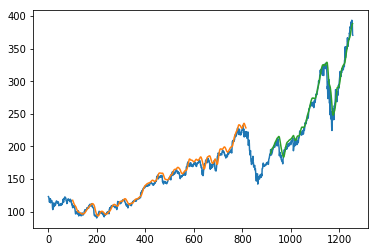

In [37]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [38]:
len(test_data)

440

In [39]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 99)

In [40]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [41]:
temp_input

[0.6683823286812498,
 0.6555478570721567,
 0.5801247154310601,
 0.6433732554686725,
 0.6106766966907519,
 0.5209343759279421,
 0.619057045761985,
 0.5010722887591145,
 0.5362103665577881,
 0.5157873898841927,
 0.5095516183311887,
 0.45827971889537766,
 0.442211884258801,
 0.5164802533900821,
 0.5119931373519416,
 0.5546207397142763,
 0.5193176944142004,
 0.5426440991124748,
 0.5409284370978916,
 0.4967831337226566,
 0.5100465208353954,
 0.49843280873667883,
 0.5679171203272956,
 0.5578870962420404,
 0.5797947804282556,
 0.586129532482101,
 0.603484113629615,
 0.6490151440166287,
 0.6403708469431522,
 0.6478273780065327,
 0.6349929063974397,
 0.6156257217328186,
 0.5873832854927579,
 0.6128872612095417,
 0.609356956679534,
 0.6355537959022073,
 0.6362136659078161,
 0.6210696492790919,
 0.651258702035699,
 0.6712857567059289,
 0.6556798310732785,
 0.6691741726879805,
 0.6836913128113761,
 0.6938203173974726,
 0.704081295984691,
 0.7251641426638952,
 0.7412649708007523,
 0.729387310699792

In [60]:
from numpy import array
import matplotlib.pyplot as plt

def prediction():
    # demonstrate prediction for next 10 days
    lst_output=[]
    n_steps=100
    i=0
    while(i<30):
    
        if(len(temp_input)>100):
            #print(temp_input)
            x_input=np.array(temp_input[1:])
            print("{} day input {}".format(i,x_input))
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            #print(x_input)
            yhat = model.predict(x_input, verbose=0)
            print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.extend(yhat.tolist())
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps,1))
            yhat = model.predict(x_input, verbose=0)
            print(yhat[0])
            temp_input.extend(yhat[0].tolist())
            print(len(temp_input))
            lst_output.extend(yhat.tolist())
            i=i+1
    
    day_new=np.arange(1,101)
    day_pred=np.arange(101,131)

    plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
    plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [61]:
    plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
    plt.plot(day_pred,scaler.inverse_transform(lst_output))

NameError: name 'day_new' is not defined

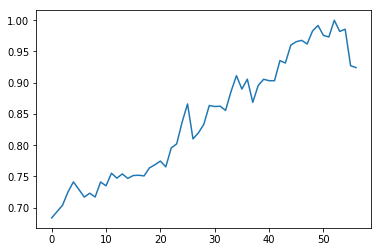

In [48]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [49]:
df3=scaler.inverse_transform(df3).tolist()

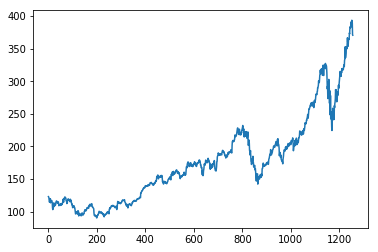

In [50]:
plt.plot(df3)